In [41]:
from keras.src.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import glob
from PIL import Image
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')
import seaborn as sns
import os

In [42]:
images=glob.glob('data/Train/*.png')

In [43]:
width=100
height=100

In [44]:
x=[]
y=[]
 
for i in images:
    filename=os.path.basename(i)
    label=filename.split('_')[0]
    img=np.array(Image.open(i).convert('L').resize((width,height)))
    x.append(img)
    y.append(label)


In [45]:
x=np.array(x)
x=x.reshape(-1,width,height,1)

<Axes: xlabel='count'>

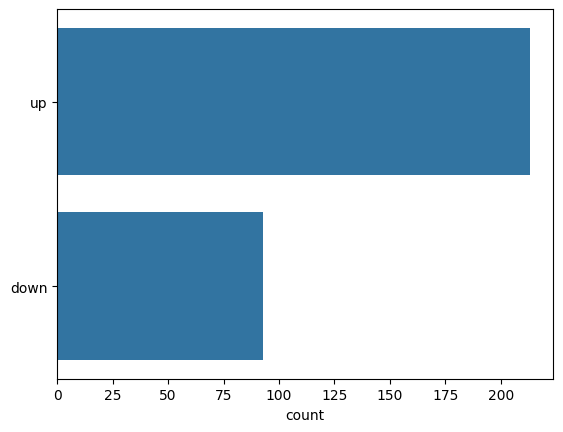

In [46]:
sns.countplot(y)

In [47]:
def onehot(values):
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    onehot_encoder = OneHotEncoder(sparse_output=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded

y = onehot(y)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(244, 100, 100, 1)
(62, 100, 100, 1)
(244, 2)
(62, 2)


In [56]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(width,height,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2,activation='softmax'))


In [57]:
model.compile(optimizer=Adam(learning_rate=0.01) ,loss='categorical_crossentropy',metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 96, 96, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 147456)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    18,874,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,893,570 (72.07 MB)

 Trainable params: 18,893,570 (72.07 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
history=model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 316ms/step - accuracy: 0.5128 - loss: 18246.2324
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6293 - loss: 292.2481
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7165 - loss: 85.3466
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5046 - loss: 6.9531
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5647 - loss: 1.1221
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6813 - loss: 0.6643
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6927 - loss: 0.6495
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7461 - loss: 0.6220
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7123 - loss: 0.6240
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7388 - loss: 0.6046
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7051 - loss: 0.6165
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6875 - loss: 

In [54]:
score_train=model.evaluate(X_train,y_train)
score_test=model.evaluate(X_test,y_test)

print('Train loss:',score_train[0])
print('Train accuracy:',score_train[1])
print('Test loss:',score_test[0])
print('Test accuracy:',score_test[1])


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.7007 - loss: 0.6103
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step - accuracy: 0.6697 - loss: 0.6372
Train loss: 0.6030909419059753
Train accuracy: 0.7090163826942444
Test loss: 0.6584109663963318
Test accuracy: 0.6451612710952759


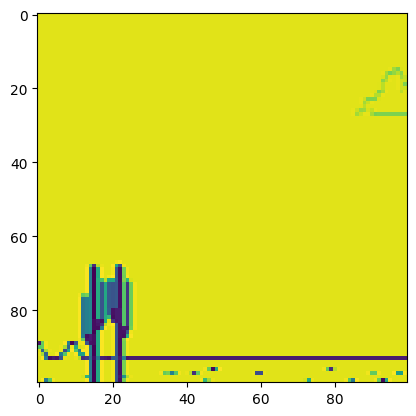

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted: 1
Actual: 1


In [72]:
#predict and plot
img=X_test[61]
plt.imshow(img.reshape(width,height))
plt.show()
print('Predicted:',model.predict(img.reshape(-1,width,height,1)).argmax())
print('Actual:',y_test[0].argmax())
